<a href="https://colab.research.google.com/github/19mddill/Machine_Learning_Projects/blob/main/linear_model_training_principles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

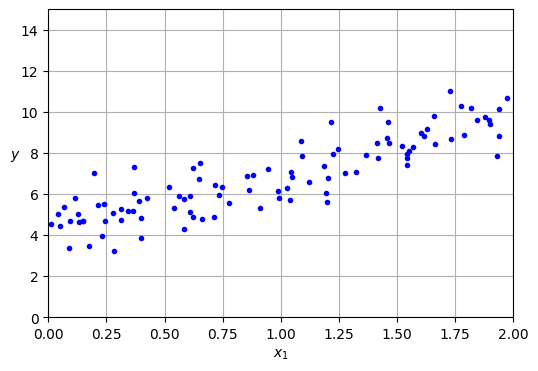

In [ ]:
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m,1)
y = 4 + 3 * X + np.random.randn(m,1)
# extra code – generates and saves Figure 4–1

import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)

# normal equation




In [ ]:
theta_best_vector = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best_vector

array([[4.21509616],
       [2.77011339]])

In [ ]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
X_new_b

array([[1., 0.],
       [1., 2.]])

In [ ]:
y_predict = X_new_b @ theta_best_vector
y_predict

array([[4.21509616],
       [9.75532293]])

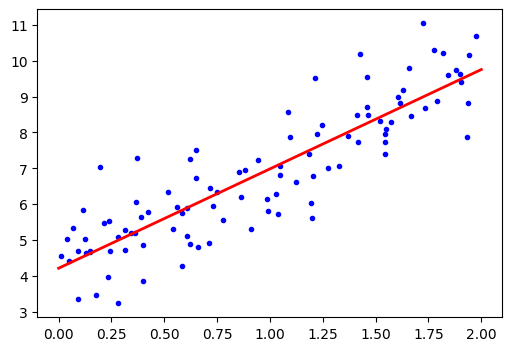

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "r-", linewidth=2)

# LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [ ]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

# Least squares

In [ ]:
theta_best_svd,residuals,rank,s = np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [ ]:
residuals # residuals[0] = ||y - X_b @ theta_best_svd||^2

array([80.6584564])

In [ ]:
rank,X_b

(np.int32(2),
 array([[1.        , 0.74908024],
        [1.        , 1.90142861],
        [1.        , 1.46398788],
        [1.        , 1.19731697],
        [1.        , 0.31203728],
        [1.        , 0.31198904],
        [1.        , 0.11616722],
        [1.        , 1.73235229],
        [1.        , 1.20223002],
        [1.        , 1.41614516],
        [1.        , 0.04116899],
        [1.        , 1.9398197 ],
        [1.        , 1.66488528],
        [1.        , 0.42467822],
        [1.        , 0.36364993],
        [1.        , 0.36680902],
        [1.        , 0.60848449],
        [1.        , 1.04951286],
        [1.        , 0.86389004],
        [1.        , 0.58245828],
        [1.        , 1.22370579],
        [1.        , 0.27898772],
        [1.        , 0.5842893 ],
        [1.        , 0.73272369],
        [1.        , 0.91213997],
        [1.        , 1.57035192],
        [1.        , 0.39934756],
        [1.        , 1.02846888],
        [1.        , 1.18482914],


In [ ]:
s # singular values of X_b , sqrt of X_bt.X_b eigenvalues

array([14.37020392,  4.11961067])

In [ ]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2,1)
print(theta)
for epoch in range(n_epochs):
  gradients = 2/m * X_b.T @ (X_b @ theta - y)
  theta -= eta * gradients

[[ 0.49671415]
 [-0.1382643 ]]


In [ ]:
theta

array([[4.21509616],
       [2.77011339]])

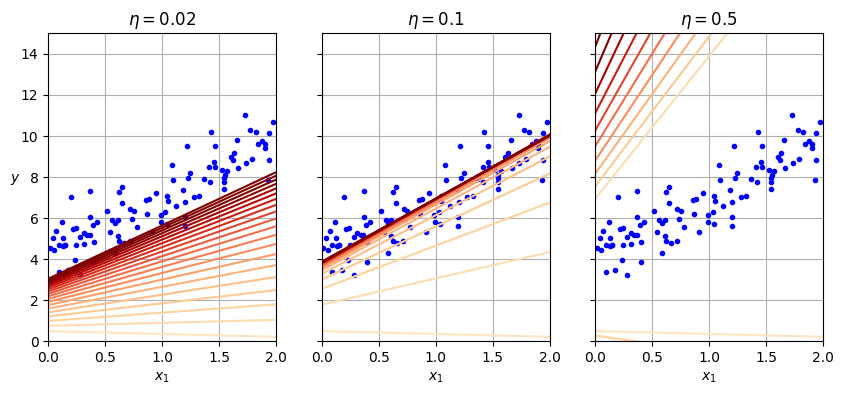

In [ ]:
# extra code – generates and saves Figure 4–8

import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5)
plt.show()

In [ ]:
# Need to investigate this code!
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0/ (t + t1)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  for iteration in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index + 1]
    yi = y[random_index:random_index + 1]
    gradients = 2 * xi.T @ (xi @ theta - yi)
    eta = learning_schedule(epoch * m + iteration)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.21076011],
       [2.74856079]])

In [ ]:
for i in range(10):
  r = np.random.randint(10)
  xi = X_b[r:r+1]
  print(xi)
  print('\n')


[[1.         0.31198904]]


[[1.         1.46398788]]


[[1.         1.46398788]]


[[1.         0.11616722]]


[[1.         0.31198904]]


[[1.         1.20223002]]


[[1.         0.31198904]]


[[1.         0.31203728]]


[[1.         1.41614516]]


[[1.         0.11616722]]




In [ ]:
X_b[1:3]

array([[1.        , 1.90142861],
       [1.        , 1.46398788]])

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.15474433]), array([2.82564538]))

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(penalty=None, eta0=0.01, random_state=42,learning_rate="invscaling")
for epoch in range(n_epochs):
    for i in range(m):
        idx = np.random.randint(m)
        sgd.partial_fit(X[idx:idx+1], y[idx:idx+1].ravel())


In [ ]:
sgd.intercept_,sgd.coef_

(array([3.94954909]), array([2.99364343]))

In [ ]:
sgd_batch = SGDRegressor(
    learning_rate="constant",
    eta0=0.01,          # step size
    max_iter=1,         # ONE gradient descent pass per fit()
    tol=None,           # disable convergence stopping
    penalty=None,
    warm_start=True,
    random_state=42
)
n_epochs = 50

for epoch in range(n_epochs):
    sgd_batch.fit(X, y.ravel())
sgd_batch.intercept_,sgd.coef_

(array([4.21165426]), array([2.99364343]))

In [ ]:
import numpy as np

np.random.seed(42)

m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

# Add bias term (x0 = 1)
X_b = np.c_[np.ones((m, 1)), X]

In [ ]:
# Hyperparameters
learning_rate = 0.05
n_epochs = 50
batch_size = 10

# # Random initialization
# theta = np.random.randn(2, 1) # create 2*1 gaussian values of matrix
# print(theta)

for epoch in range(n_epochs):
    # #Shuffle data at each epoch
    # shuffled_indices = np.random.permutation(m)
    # X_shuffled = X_b[shuffled_indices]
    # y_shuffled = y[shuffled_indices]

    for i in range(0, m, batch_size):
        Xi = X_shuffled[i:i + batch_size]
        yi = y_shuffled[i:i + batch_size]

        # Gradient of MSE
        gradients = 2 / batch_size * Xi.T @ (Xi @ theta - yi)

        # Update parameters
        theta -= learning_rate * gradients


In [ ]:
theta

array([[ 7.03923535],
       [-0.25840147]])

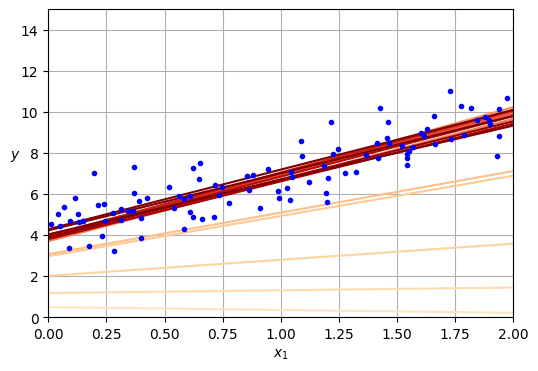

In [ ]:
theta_path_sgd =[ ]
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

n_shown = 20  # extra code – just needed to generate the figure below
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting

for epoch in range(n_epochs):
    for iteration in range(m):

        # extra code – these 4 lines are used to generate the figure
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  # extra code – to generate the figure

# extra code – this section beautifies and saves Figure 4–10
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

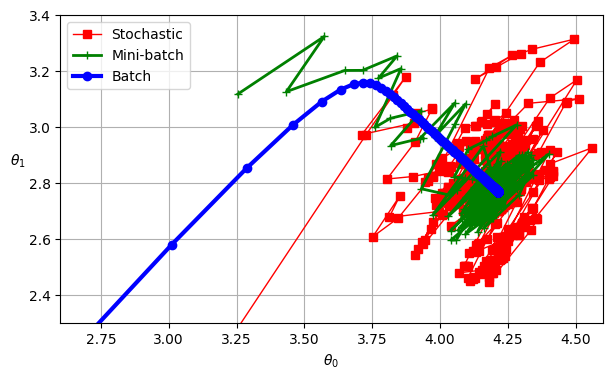

In [ ]:
# extra code – this cell generates and saves Figure 4–11

from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * n_batches_per_epoch + iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
plt.show()

# Polynomial Regression

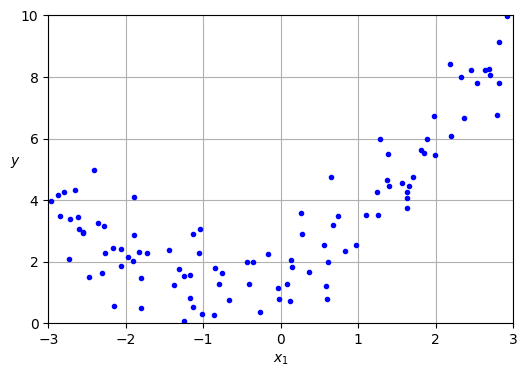

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

# extra code – this cell generates and saves Figure 4–12
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [ ]:
X_poly_features = np.hstack([X,X**2])

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly_features,y)


LinearRegression()

In [ ]:
lin_reg.intercept_,lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=3,include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly

array([[-7.52759287e-01,  5.66646544e-01, -4.26548448e-01],
       [ 2.70428584e+00,  7.31316190e+00,  1.97768801e+01],
       [ 1.39196365e+00,  1.93756281e+00,  2.69701700e+00],
       [ 5.91950905e-01,  3.50405874e-01,  2.07423074e-01],
       [-2.06388816e+00,  4.25963433e+00, -8.79140884e+00],
       [-2.06403288e+00,  4.26023172e+00, -8.79325834e+00],
       [-2.65149833e+00,  7.03044338e+00, -1.86412089e+01],
       [ 2.19705687e+00,  4.82705891e+00,  1.06053230e+01],
       [ 6.06690070e-01,  3.68072842e-01,  2.23306138e-01],
       [ 1.24843547e+00,  1.55859111e+00,  1.94580043e+00],
       [-2.87649303e+00,  8.27421218e+00, -2.38007137e+01],
       [ 2.81945911e+00,  7.94934969e+00,  2.24128664e+01],
       [ 1.99465584e+00,  3.97865194e+00,  7.93604134e+00],
       [-1.72596534e+00,  2.97895634e+00, -5.14157538e+00],
       [-1.90905020e+00,  3.64447265e+00, -6.95748124e+00],
       [-1.89957294e+00,  3.60837736e+00, -6.85437599e+00],
       [-1.17454654e+00,  1.37955958e+00

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression()

In [ ]:
lin_reg.intercept_, lin_reg.coef_

(array([1.78437842]), array([[ 1.02570217,  0.56304305, -0.01702965]]))

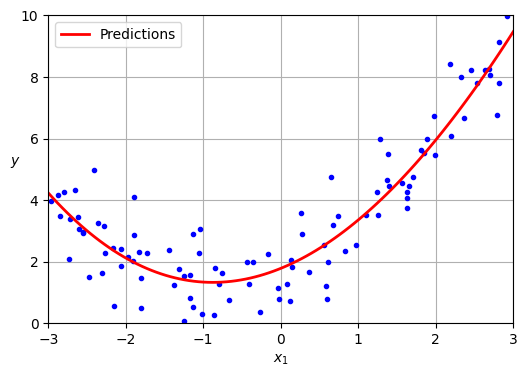

In [ ]:
# extra code – this cell generates and saves Figure 4–13

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

np.random.seed(42)
m = 5  # small number of samples to clearly see output
a = np.random.rand(m, 1)
b = np.random.rand(m, 1)
X = np.hstack([a, b])

# Just a demo target with some nonlinear interactions
y = 1 + 2*a + 3*b + 4*a*b + 0.5*a**2*b - b**3 + np.random.randn(m,1)
X

array([[0.37454012, 0.15599452],
       [0.95071431, 0.05808361],
       [0.73199394, 0.86617615],
       [0.59865848, 0.60111501],
       [0.15601864, 0.70807258]])

In [ ]:
poly = PolynomialFeatures(degree=3, include_bias=True)
X_poly = poly.fit_transform(X)

print("Original X shape:", X.shape)
print("Polynomial X shape:", X_poly.shape)
print("Polynomial features names (order):", poly.get_feature_names_out(['a','b']))
print("Expanded feature matrix:\n", X_poly)


Original X shape: (5, 2)
Polynomial X shape: (5, 10)
Polynomial features names (order): ['1' 'a' 'b' 'a^2' 'a b' 'b^2' 'a^3' 'a^2 b' 'a b^2' 'b^3']
Expanded feature matrix:
 [[1.00000000e+00 3.74540119e-01 1.55994520e-01 1.40280301e-01
  5.84262062e-02 2.43342904e-02 5.25406005e-02 2.18829582e-02
  9.11416801e-03 3.79601595e-03]
 [1.00000000e+00 9.50714306e-01 5.80836122e-02 9.03857692e-01
  5.52209211e-02 3.37370600e-03 8.59310439e-01 5.24993197e-02
  3.20743056e-03 1.95957031e-04]
 [1.00000000e+00 7.31993942e-01 8.66176146e-01 5.35815131e-01
  6.34035691e-01 7.50261116e-01 3.92213430e-01 4.64110285e-01
  5.49186591e-01 6.49858281e-01]
 [1.00000000e+00 5.98658484e-01 6.01115012e-01 3.58391981e-01
  3.59862602e-01 3.61339257e-01 2.14554400e-01 2.15434800e-01
  2.16318812e-01 2.17206452e-01]
 [1.00000000e+00 1.56018640e-01 7.08072578e-01 2.43418162e-02
  1.10472521e-01 5.01366775e-01 3.79777706e-03 1.72357725e-02
  7.82225627e-02 3.55004065e-01]]


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)

Intercept: [0.55521356]
Coefficients: [[ 3.55271368e-15  1.51735719e+00  3.61152998e+00  1.19304086e+00
   1.33739637e+00  1.14594285e+00  5.73238932e-01  1.93700534e-01
  -3.20449880e-01 -8.65418023e-01]]


# Learning Curves

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X.size

100

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1, 40),cv=5,scoring='neg_mean_squared_error'
)

In [ ]:
train_sizes

array([ 1,  2,  4,  6,  8, 10, 12, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 80])

In [ ]:
train_scores

array([[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00],
       [-1.97215226e-31, -9.86076132e-32, -9.86076132e-32,
        -9.86076132e-32, -9.86076132e-32],
       [-4.54548946e-01, -1.83716259e+00, -1.83716259e+00,
        -1.83716259e+00, -1.83716259e+00],
       [-1.25810636e+00, -2.76438736e+00, -2.76438736e+00,
        -2.76438736e+00, -2.76438736e+00],
       [-1.12585052e+00, -3.34512804e+00, -3.34512804e+00,
        -3.34512804e+00, -3.34512804e+00],
       [-1.37556755e+00, -3.17668607e+00, -3.17668607e+00,
        -3.17668607e+00, -3.17668607e+00],
       [-1.48288039e+00, -4.14591493e+00, -4.14591493e+00,
        -4.14591493e+00, -4.14591493e+00],
       [-2.38649634e+00, -3.34425388e+00, -3.34425388e+00,
        -3.34425388e+00, -3.34425388e+00],
       [-2.16814275e+00, -3.23300813e+00, -3.23300813e+00,
        -3.23300813e+00, -3.23300813e+00],
       [-2.57736716e+00, -3.32537001e+00, -3.32537001e+00,
        -3.32537001e+00

In [ ]:
valid_scores

array([[ -5.59097882,  -6.59006827, -10.98805817,  -8.84754145,
         -7.78204975],
       [ -4.5124307 ,  -6.95882531,  -7.49862882,  -5.79068943,
         -6.38128285],
       [ -5.05209527, -11.4560799 , -12.41117779, -10.31291826,
        -10.06294205],
       [ -4.3574114 ,  -2.89505414,  -3.64657283,  -2.68942978,
         -3.36849878],
       [ -4.7452172 ,  -2.62753162,  -3.27140643,  -2.78339478,
         -3.25051231],
       [ -5.24674071,  -2.52402674,  -3.54324029,  -2.87864334,
         -3.17841826],
       [ -4.51395871,  -2.80206979,  -3.30551447,  -2.96244271,
         -3.42442945],
       [ -3.46537264,  -2.73656784,  -3.25567012,  -2.85100845,
         -3.35506363],
       [ -3.47387009,  -2.65811109,  -3.23419491,  -2.75190369,
         -3.27282359],
       [ -3.50352391,  -2.54985962,  -3.31467521,  -2.69381615,
         -3.16797417],
       [ -3.50840062,  -2.54483651,  -3.40684441,  -2.67382618,
         -3.15786138],
       [ -3.63480808,  -2.52242326,  -3.420

In [ ]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

In [ ]:
train_errors, valid_errors

(array([-0.00000000e+00,  1.18329136e-31,  1.56063986e+00,  2.46313116e+00,
         2.90127253e+00,  2.81646236e+00,  3.61330802e+00,  3.15270237e+00,
         3.02003505e+00,  3.17576944e+00,  3.13954228e+00,  3.14994690e+00,
         3.27292776e+00,  3.07800510e+00,  3.08551701e+00,  3.12869523e+00,
         3.07403095e+00,  3.17946978e+00,  3.07287161e+00,  3.11237024e+00,
         3.05837025e+00,  3.10560750e+00,  3.13382115e+00,  3.03899926e+00,
         3.02447732e+00,  3.16796822e+00,  3.23229318e+00,  3.19079454e+00,
         3.11923203e+00,  3.05466528e+00,  3.08183838e+00,  3.07726659e+00,
         3.11511815e+00,  3.03295384e+00,  3.06153261e+00,  3.06609301e+00,
         3.03195600e+00,  3.01719274e+00,  3.02539517e+00,  3.02119451e+00]),
 array([7.95973929, 6.22837142, 9.85904265, 3.39139339, 3.33561247,
        3.47421387, 3.40168303, 3.13273654, 3.07818067, 3.04596981,
        3.05835382, 3.08412557, 3.12892573, 3.12344771, 3.1923966 ,
        3.16342831, 3.18321569, 3.

(np.float64(0.0), np.float64(80.0), np.float64(0.0), np.float64(4.5))

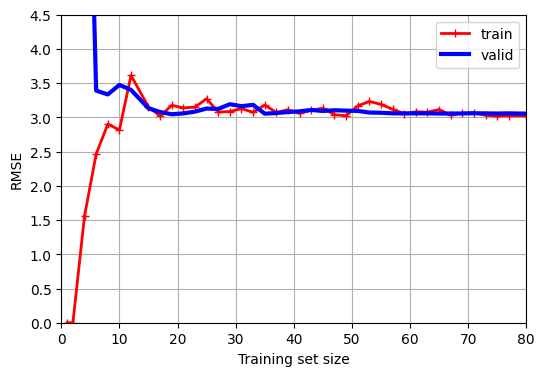

In [ ]:
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()

plt.legend(loc="upper right")
plt.axis([0, 80, 0, 4.5])

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

polynomial_regression = make_pipeline(PolynomialFeatures(degree=10), LinearRegression())

In [ ]:
train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1, 40),cv=5,scoring='neg_mean_squared_error'
)

In [ ]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

(np.float64(0.0), np.float64(80.0), np.float64(0.0), np.float64(2.5))

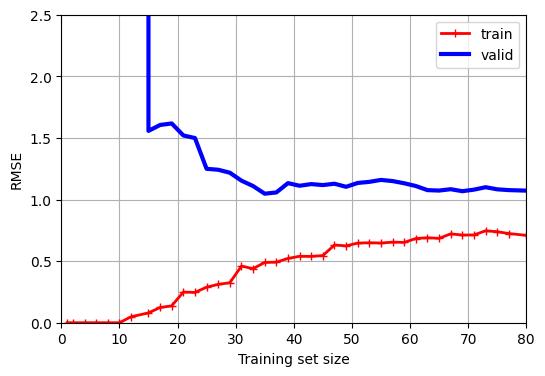

In [ ]:
plt.figure(figsize=(6, 4))  # extra code – not needed, just formatting
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()

plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])

# Ridge Regression

In [3]:
import numpy as np

np.random.seed(42)

m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)
X_b = np.c_[np.ones((m, 1)), X]

In [10]:
eta = 0.1
n_epochs = 1000
m = len(X_b)
alpha = 1

np.random.seed(42)
theta = np.random.randn(2,1)
print("Initial theta:\n", theta)

for epoch in range(n_epochs):
    gradients = 2/m * X_b.T @ (X_b @ theta - y)  # MSE gradient

    # skip bias
    gradients[1:, :] += 2 * alpha / m * theta[1:, :]

    # Update theta
    theta -= eta * gradients

print("Trained theta:\n", theta)

eta = 0.1
n_epochs = 1000
m = len(X_b)
alpha = 1

np.random.seed(42)
theta = np.random.randn(2,1)
print("\nnon regularized\nInitial theta:\n", theta)

for epoch in range(n_epochs):
    gradients = 2/m * X_b.T @ (X_b @ theta - y)  # MSE gradient

    # skip bias
    #gradients[1:, :] += 2 * alpha / m * theta[1:, :]

    # Update theta
    theta -= eta * gradients

print("Trained theta:\n", theta)


Initial theta:
 [[ 0.49671415]
 [-0.1382643 ]]
Trained theta:
 [[4.28736241]
 [2.69326395]]

non regularized
Initial theta:
 [[ 0.49671415]
 [-0.1382643 ]]
Trained theta:
 [[4.21509616]
 [2.77011339]]


In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [12]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=0.1, solver='cholesky')

In [13]:
ridge_reg.predict([[1.5]])

array([4.82899748])

In [16]:
from sklearn.linear_model import SGDRegressor
sdg_reg = SGDRegressor(penalty="l2", alpha=0.1, max_iter=1000,tol=None,eta0=0.01,random_state=42)

In [17]:
sdg_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.1, random_state=42, tol=None)

In [19]:
sdg_reg.predict([[1.5]])

array([4.7852203])